#**201955718 - MELIA PUTRI H - 머신러닝 Assignment 4 (APPLIED)**
From the textbook ***“Introduction to Statistical Learning”*** by Gareth James, Daniela Witten, Trevor Hastie, Robert Tibshirani
1. **No.5 Page 209-210 PDF (198-199 Physical Book): Default Dataset**




###**0. Importing the Libraries**

In [ ]:
#Libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

###**1. Problem No.5 Page 209-210 PDF (198-199 Physical Book): Default Dataset**

In Chapter 4, we used logistic regression to predict the probability of default using income and balance on the `Default` data set. We will now estimate the test error of this logistic regression model using the validation set approach. Do not forget to set a random seed before beginning your analysis. The dataset used in this section contains customer default records for a credit card company, a data frame with 10000 observations on the following 4 variables.

**Attributes:**
* `default` : A factor with levels `No` and `Yes` indicating whether the customer defaulted on their debt
* `student` :  factor with levels `No` and `Yes` indicating whether the customer is a student
* `balance` : The average balance that the customer has remaining on their credit card after making their monthly payment
* `income` : Income of customer

#####**Processing the Dataset**

In the section, I will retrive the data from the internet, from the link that is put in the cell below:

In [ ]:
#Importing the Data Set
default_url="https://raw.githubusercontent.com/qx0731/Sharing_ISL_python/master/data/Default.csv"
default=pd.read_csv(default_url,na_values='?')

#Checking Missing Values
default.isnull().sum()

default    0
student    0
balance    0
income     0
dtype: int64

In [ ]:
#Showing the Data Set
default

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879
...,...,...,...,...
9995,No,No,711.555020,52992.378914
9996,No,No,757.962918,19660.721768
9997,No,No,845.411989,58636.156984
9998,No,No,1569.009053,36669.112365


In [ ]:
#Create new columns that change Yes to 1 and No to 0
default['default_']=np.where(default['default']=='Yes',1,0)
default['student_']=np.where(default['student']=='Yes',1,0)
default

,default,student,balance,income,default_,student_
0,No,No,729.526495,44361.625074,0,0
1,No,Yes,817.180407,12106.134700,0,1
2,No,No,1073.549164,31767.138947,0,0
3,No,No,529.250605,35704.493935,0,0
4,No,No,785.655883,38463.495879,0,0
...,...,...,...,...,...,...
9995,No,No,711.555020,52992.378914,0,0
9996,No,No,757.962918,19660.721768,0,0
9997,No,No,845.411989,58636.156984,0,0
9998,No,No,1569.009053,36669.112365,0,0


#####**(a) Fit a logistic regression model that uses income and balance to predict default.**

In [ ]:
#Split the data into X and Y
X=default[['income','balance']].values
y=default['default_'].values
print(X.shape)
print(y.shape)

(10000, 2)
(10000,)


In [ ]:
#Create the Model --> Logistic Regression using skl_lm
import sklearn.linear_model as skl_lm
logreg1=skl_lm.LogisticRegression()
logreg1.fit(X,y)
print('Classes:',logreg1.classes_)
print('Coefficient:',logreg1.coef_)
print('Intercept:',logreg1.intercept_)

Classes: [0 1]
Coefficient: [[2.08091985e-05 5.64710797e-03]]
Intercept: [-11.54047812]


In [ ]:
#Create the Model --> Logistic Regression using Sci-Kit Learn
from sklearn.linear_model import LogisticRegression
logreg2=LogisticRegression(C=1e9,tol=.0000001)
logreg2.fit(X,y)

print('Classes:',logreg2.classes_)
print('Coefficient:',logreg2.coef_)
print('Intercept:',logreg2.intercept_)

Classes: [0 1]
Coefficient: [[2.08089921e-05 5.64710291e-03]]
Intercept: [-11.54046839]


#####**(b) Using the validation set approach, estimate the test error of this model. In order to do this, you must perform the following steps:**

######**(i) Split the sample set into a training set and a validation set.**

In [ ]:
#Import train_test_split library
from sklearn.model_selection import train_test_split

In [ ]:
#Split the data into train and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5000, 2)
(5000, 2)
(5000,)
(5000,)


######**(ii) Fit a multiple logistic regression model using only the training observations.**

In [ ]:
#Logistic Regression using skl_lm to TRAIN DATA ONLY
import sklearn.linear_model as skl_lm
logreg1=skl_lm.LogisticRegression()
logreg1.fit(X_train,y_train)
print('Classes:',logreg1.classes_)
print('Coefficient:',logreg1.coef_)
print('Intercept:',logreg1.intercept_)

Classes: [0 1]
Coefficient: [[-0.00012769  0.00049358]]
Intercept: [-1.03961144e-06]


In [ ]:
#Logistic Regression using Sci-Kit Learn to TRAIN DATA ONLY
from sklearn.linear_model import LogisticRegression
logreg2=LogisticRegression()
logreg2.fit(X_train,y_train)

print('Classes:',logreg2.classes_)
print('Coefficient:',logreg2.coef_)
print('Intercept:',logreg2.intercept_)

Classes: [0 1]
Coefficient: [[-0.00012769  0.00049358]]
Intercept: [-1.03961144e-06]


######**(iii)  Obtain a prediction of default status for each individual in the validation set by computing the posterior probability of default for that individual, and classifying the individual to the default category if the posterior probability is greater than 0.5.**

In [ ]:
#Confusion Matrix
logreg_probs=logreg1.predict(X_test)
logreg_pred=np.where(logreg_probs>0.5,1,0)

In [ ]:
#Confusion Matrix
conf_matrix=pd.crosstab(logreg1.predict(X_test),y_test,rownames=['Predicted'],colnames=['Actual'],margins=True)
conf_matrix

Actual,0,1,All
Predicted,,,
0,4839,159,4998
1,2,0,2
All,4841,159,5000


In [ ]:
#What the Confusion Matrix tells us?
print("The Correct Prediction of 'No' is:",conf_matrix.iloc[0,0],"over",conf_matrix.iloc[2,0],
      "which is",conf_matrix.iloc[0,0]/conf_matrix.iloc[2,0],"%")
print("The Correct Prediction of 'Yes' is:",conf_matrix.iloc[1,1],"over",conf_matrix.iloc[2,1],
      "which is",conf_matrix.iloc[1,1]/conf_matrix.iloc[2,1],"%")
print("The Accuracy of the Overall Prediction is:",
      ((conf_matrix.iloc[0,0]+conf_matrix.iloc[1,1])/conf_matrix.iloc[2,2]),"%")
print("The Error Rate of the Overall Prediction is:",
      (1-(conf_matrix.iloc[0,0]+conf_matrix.iloc[1,1])/conf_matrix.iloc[2,2]),"%")

The Correct Prediction of 'No' is: 4839 over 4841 which is 0.9995868622185499 %
The Correct Prediction of 'Yes' is: 0 over 159 which is 0.0 %
The Accuracy of the Overall Prediction is: 0.9678 %
The Error Rate of the Overall Prediction is: 0.032200000000000006 %


In [ ]:
tn=conf_matrix.iloc[0][0]
tp=conf_matrix.iloc[1][1]
fn=conf_matrix.iloc[0][1]
fp=conf_matrix.iloc[1][0]

In [ ]:
#There is an error when calling conf_matrix.iloc[2][2] as the 'all' value, so:
all=5000

In [ ]:
accuracy=(tp+tn)/all
error_rate=(fp+fn)/all

print("Test Accuracy: "+str(accuracy))
print("Test Error Rate: "+str(error_rate))

Test Accuracy: 0.9678
Test Error Rate: 0.0322


######**(iv) Compute the validation set error, which is the fraction of the observations in the validation set that are misclassified.**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [ ]:
poly=PolynomialFeatures(degree=1,include_bias=False)

Text(0, 0.5, 'MSE')

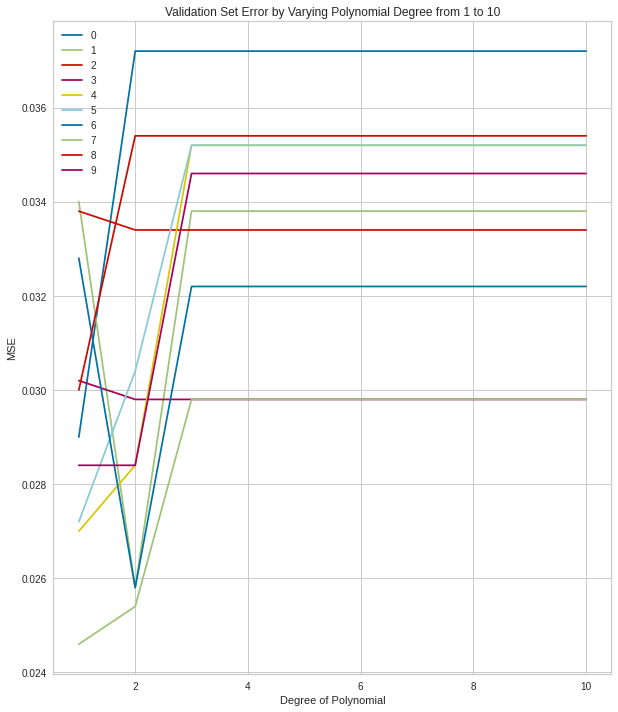

In [ ]:
plt.figure(figsize=(10,12),facecolor='w')
plt.title("Validation Set Error by Varying Polynomial Degree from 1 to 10")

for k in range(10): #We repeat the same procedure by 10 and with changes in random_state
  mse=[]
  for i in range(1,11):
    poly=PolynomialFeatures(degree=i,include_bias=False)
    X_temp=poly.fit_transform(X)
    #For each iteration, we have to fix the sequence of splitting the dataset
    #In order to do so, we have to fix the random_state
    X_train,X_test,y_train,y_test=train_test_split(X_temp,y,shuffle=True,test_size=0.5,random_state=k*3)
    logreg1=skl_lm.LogisticRegression()
    logreg1.fit(X_train,y_train)    
    y_pred=logreg1.predict(X_test)    
    mse.append(mean_squared_error(y_test,y_pred))
  plt.plot(np.arange(1,11),mse)
  plt.legend(np.arange(k*3))      
  #mse=[]

plt.xlabel('Degree of Polynomial')
plt.ylabel('MSE')

In the plot above, we can see the visualization of changes in MSE for different degree of polynomial when given different value of random_state that varied best on k value that range from 0 to 9.

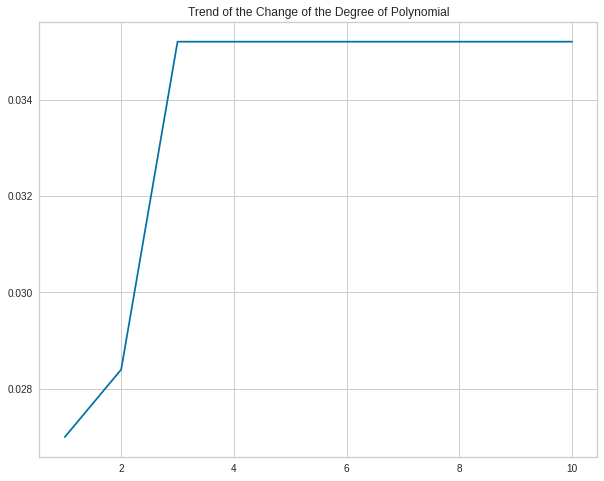

In [ ]:
mse=[]
for i in range(1,11):
  poly=PolynomialFeatures(degree=i,include_bias=False)
  X_temp=poly.fit_transform(X)
  #For each iteration, we have to fix the sequence of splitting the dataset
  #In order to do so, we have to fix the random_state
  X_train,X_test,y_train,y_test=train_test_split(X_temp,y,shuffle=True,test_size=0.5,random_state=4*3)
  logreg1=skl_lm.LogisticRegression()
  logreg1.fit(X_train,y_train)    
  y_pred=logreg1.predict(X_test)    
  mse.append(mean_squared_error(y_test,y_pred))
plt.figure(figsize=(10,8),facecolor='w')
plt.title("Trend of the Change of the Degree of Polynomial")
plt.plot(np.arange(1,11),mse)

#####**(c) Repeat the process in (b) three times, using three different splits of the observations into a training set and a validation set. Comment on the results obtained.**

In [ ]:
logreg=LogisticRegression(C=1e9, tol=.0000001)

for i in range(2,5):
    X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.5, random_state=i)
    logreg.fit(X_train, y_train)
    conf_matrix=pd.crosstab(logreg.predict(X_test),y_test,rownames=['Predicted'],colnames=['Actual'], margins=True)
    TN = conf_matrix.iloc[0][0]
    TP = conf_matrix.iloc[1][1]
    FN = conf_matrix.iloc[0][1]
    FP = conf_matrix.iloc[1][0]
    ALL = 5000
    accuracy = (TP+TN)/ALL
    error_rate = (FP+FN)/ALL
    print(conf_matrix)
    print("Test error rate: " + str(error_rate) + "\n")

Actual        0    1   All
Predicted                 
0          4844  154  4998
1             2    0     2
All        4846  154  5000
Test error rate: 0.0312

Actual        0    1   All
Predicted                 
0          4830  169  4999
1             1    0     1
All        4831  169  5000
Test error rate: 0.034

Actual        0    1   All
Predicted                 
0          4818  100  4918
1            19   63    82
All        4837  163  5000
Test error rate: 0.0238



#####**(d)  Now consider a logistic regression model that predicts the probability of default using income, balance, and a dummy variable for student. Estimate the test error for this model using the validation set approach. Comment on whether or not including a dummy variable for student leads to a reduction in the test error rate**

In [ ]:
#Split the data into X and Y
X=default[['income','balance','student_']].values
y=default['default_'].values
print(X.shape)
print(y.shape)

(10000, 3)
(10000,)


In [ ]:
#Split the data into train and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5000, 3)
(5000, 3)
(5000,)
(5000,)


In [ ]:
#Logistic Regression using skl_lm to TRAIN DATA ONLY
import sklearn.linear_model as skl_lm
logreg1=skl_lm.LogisticRegression()
logreg1.fit(X,y)
print('Classes:',logreg1.classes_)
print('Coefficient:',logreg1.coef_)
print('Intercept:',logreg1.intercept_)

Classes: [0 1]
Coefficient: [[-1.33893466e-04  4.08201022e-03 -3.89009045e+00]]
Intercept: [-2.9508496]


In [ ]:
#Confusion Matrix
logreg_probs=logreg1.predict(X_test)
logreg_pred=np.where(logreg_probs>0.5,1,0)

In [ ]:
#Confusion Matrix
conf_matrix=pd.crosstab(logreg1.predict(X_test),y_test,rownames=['Predicted'],colnames=['Actual'],margins=True)
conf_matrix

Actual,0,1,All
Predicted,,,
0,4813,135,4948
1,28,24,52
All,4841,159,5000


In [ ]:
#What the Confusion Matrix tells us?
print("The Correct Prediction of 'No' is:",conf_matrix.iloc[0,0],"over",conf_matrix.iloc[2,0],
      "which is",conf_matrix.iloc[0,0]/conf_matrix.iloc[2,0],"%")
print("The Correct Prediction of 'Yes' is:",conf_matrix.iloc[1,1],"over",conf_matrix.iloc[2,1],
      "which is",conf_matrix.iloc[1,1]/conf_matrix.iloc[2,1],"%")
print("The Accuracy of the Overall Prediction is:",
      ((conf_matrix.iloc[0,0]+conf_matrix.iloc[1,1])/conf_matrix.iloc[2,2]),"%")
print("The Error Rate of the Overall Prediction is:",
      (1-(conf_matrix.iloc[0,0]+conf_matrix.iloc[1,1])/conf_matrix.iloc[2,2]),"%")

The Correct Prediction of 'No' is: 4813 over 4841 which is 0.9942160710596984 %
The Correct Prediction of 'Yes' is: 24 over 159 which is 0.1509433962264151 %
The Accuracy of the Overall Prediction is: 0.9674 %
The Error Rate of the Overall Prediction is: 0.03259999999999996 %
